In [1]:
from experiments.scp_experiment import SCP_Experiment
from utils import utils
# model configs
from configs.fastai_configs import *
from configs.wavelet_configs import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 整理数据 demo

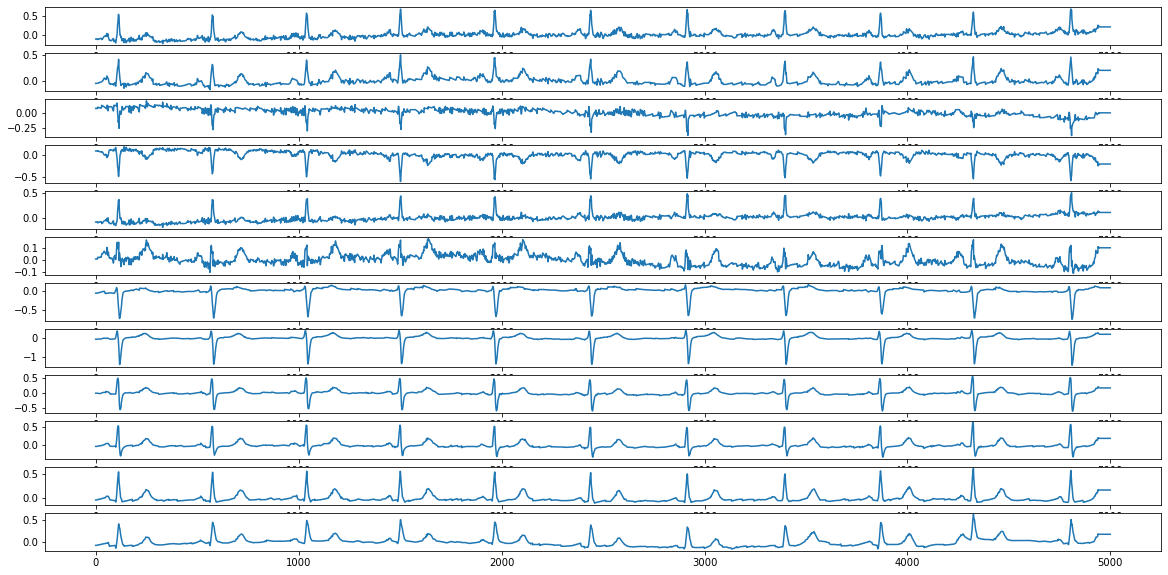

In [7]:
plt.figure(figsize = (20,10))
for i in range(12):
    plt.subplot(12,1,i+1)
    plt.plot(e.data[0][:,i])
    # plt.plot(e.X_train[0][:,i])
plt.show()

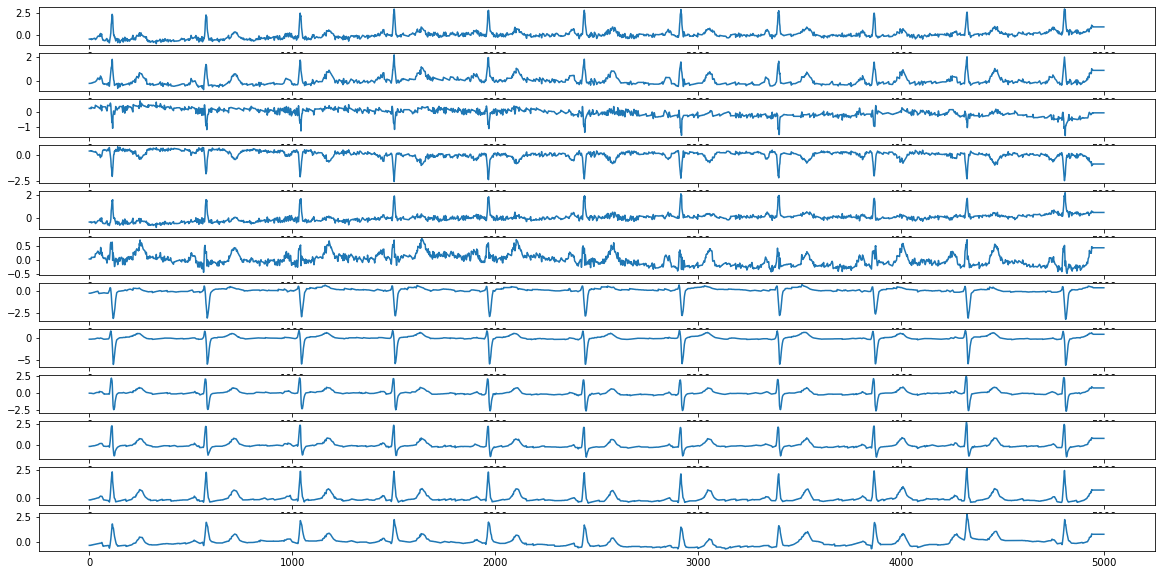

In [8]:
plt.figure(figsize = (20,10))
for i in range(12):
    plt.subplot(12,1,i+1)
    # plt.plot(e.data[0][:,i])
    plt.plot(e.X_train[0][:,i])
plt.show()

## 模型参数量

In [1]:
from models.xresnet1d import xresnet1d18,xresnet1d34,xresnet1d50,xresnet1d101,xresnet1d152,xresnet1d18_deep,xresnet1d34_deep,xresnet1d50_deep,xresnet1d18_deeper,xresnet1d34_deeper,xresnet1d50_deeper
from models.inception1d import inception1d
from torchsummary import summary 
import torch

In [7]:
# model = xresnet1d101(num_classes=71,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
from models.basic_conv1d import fcn_wang
model = fcn_wang(num_classes=2,input_channels=8,lin_ftrs_head=None, ps_head=0.5, bn_final_head=False, bn_head=True, act_head="relu", concat_pooling=True)
from fvcore.nn import *
tensor = (torch.rand( 1, 8, 5000),)
# model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model, tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::adaptive_max_pool1d encountered 1 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 1 time(s)


FLOPs:  1356529664 n_parameters :  272386


In [6]:
# model = xresnet1d101(num_classes=71,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
from models.basic_conv1d_nf import fcn_wang
model = fcn_wang(num_classes=2,input_channels=8,lin_ftrs_head=None, ps_head=0.5, bn_final_head=False, bn_head=True, act_head="relu", concat_pooling=True)
from fvcore.nn import *
tensor = (torch.rand( 1, 8, 5000),)
# model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model, tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::adaptive_max_pool1d encountered 1 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 1 time(s)


FLOPs:  1356529664 n_parameters :  272386


In [2]:
# model = xresnet1d101(num_classes=71,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
from models.inception1d_nf import inception1d
model = inception1d(num_classes=71,input_channels=12,use_residual=True,ps_head=0.5,lin_ftrs_head=[128],kernel_size=8*5)
from fvcore.nn import *
tensor = (torch.rand( 1, 12, 5000),)

model = inception1d(num_classes=31,input_channels=12,use_residual=True,ps_head=0.5,lin_ftrs_head=[128],kernel_size=8*5)
# model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model, tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

516167


516167

In [24]:
from models.xresnet1d_nf import xresnet1d101
import torch
model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
X = torch.randn(2, 12, 5000)
# model(X)

In [ ]:
model = xresnet1d101(num_classes=71,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
X = torch.randn(2, 12, 5000)
model(X)

In [14]:
summary(model,input_size=(12,5000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 32, 2500]           1,920
       BatchNorm1d-2             [-1, 32, 2500]              64
              ReLU-3             [-1, 32, 2500]               0
            Conv1d-4             [-1, 32, 2500]           5,120
       BatchNorm1d-5             [-1, 32, 2500]              64
              ReLU-6             [-1, 32, 2500]               0
            Conv1d-7             [-1, 64, 2500]          10,240
       BatchNorm1d-8             [-1, 64, 2500]             128
              ReLU-9             [-1, 64, 2500]               0
        MaxPool1d-10             [-1, 64, 1250]               0
           Conv1d-11             [-1, 64, 1250]           4,096
           Conv1d-12             [-1, 64, 1250]           4,096
      BatchNorm1d-13             [-1, 64, 1250]             128
      BatchNorm1d-14             [-1, 6

In [2]:
from models.xresnet1d_nf_dsc import dsc_xresnet1d101
from models.xception import xception

import torch
# model = dsc_xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
model = xception(num_classes=31,input_channels=12)
from fvcore.nn import *
tensor = (torch.rand( 1, 12, 5000),)

# model = inception1d(num_classes=31,input_channels=12,use_residual=True,ps_head=0.5,lin_ftrs_head=[128],kernel_size=8*5)
# model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model, tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::max_pool1d encountered 4 time(s)
Unsupported operator aten::add_ encountered 8 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 1 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
block10, block10.relu, block10.rep, block10.rep.0, block10.rep.1, block10.rep.1.conv1, block10.rep.1.pointwise, block10.rep.2, block10.rep.4, block10.rep.4.conv1, block10.rep.4.pointwise, block10.rep.5, block10.rep.7, block10.rep.7.conv1, block10.rep.7.pointwise, block10.rep.8, block11, block11.relu, block11.rep, block11.rep.0, block11.rep.1, block11.rep.1.conv1, block11.rep.1.pointwise, block11.rep.2, block11.rep.4, block11.rep.4.conv1, block11.rep.4.pointwise, block11.rep.5, block11.rep.7

FLOPs:  4016355576 n_parameters :  20720183


In [28]:
  819 621 120
2 366 757 504
3 653 996 654



(436.9879319583177, 4631.555935632976)

In [35]:
3* 150000 / 12000 

37.5

In [29]:
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Activation, Add, Flatten, Dense)
from tensorflow.keras.models import Model
import numpy as np

class ResidualUnit(object):
    def __init__(self, n_samples_out, n_filters_out, kernel_initializer='he_normal',
                 dropout_keep_prob=0.8, kernel_size=17, preactivation=True,
                 postactivation_bn=False, activation_function='relu'):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = 1 - dropout_keep_prob
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1]
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2]
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(self.dropout_rate)(x)

        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
            y = x
        return [x, y]


def get_model(n_classes, last_layer='sigmoid'):
    kernel_size = 16
    kernel_initializer = 'he_normal'
    signal = Input(shape=(4096, 12), dtype=np.float32, name='signal')
    x = signal
    x = Conv1D(64, kernel_size, padding='same', use_bias=False,
               kernel_initializer=kernel_initializer)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x, y = ResidualUnit(1024, 128, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, x])
    x, y = ResidualUnit(256, 196, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, y = ResidualUnit(64, 256, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,
                        kernel_initializer=kernel_initializer)([x, y])
    x = Flatten()(x)
    diagn = Dense(n_classes, activation=last_layer, kernel_initializer=kernel_initializer)(x)
    model = Model(signal, diagn)
    return model


if __name__ == "__main__":
    model = get_model(6)
    model.summary()

2022-06-16 08:29:36.370802: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 08:29:36.371134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 08:29:36.373183: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             [(None, 4096, 12)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4096, 64)     12288       signal[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4096, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [30]:
import  tensorflow as tf
from tensorflow.python.framework.convert_to_constants import  convert_variables_to_constants_v2_as_graph
def get_flops(model):
    concrete = tf.function(lambda inputs: model(inputs))
    concrete_func = concrete.get_concrete_function(
        [tf.TensorSpec([1, *inputs.shape[1:]]) for inputs in model.inputs])
    frozen_func, graph_def = convert_variables_to_constants_v2_as_graph(concrete_func)
    with tf.Graph().as_default() as graph:
        tf.graph_util.import_graph_def(graph_def, name='')
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=graph, run_meta=run_meta, cmd="op", options=opts)
        return flops.total_float_ops

print("The FLOPs is:{}".format(get_flops(model)) ,flush=True )

2022-06-16 08:31:30.921061: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2022-06-16 08:31:30.921351: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2022-06-16 08:31:30.961265: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3293680000 Hz
2022-06-16 08:31:30.965894: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.006ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.



Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
op: The nodes are operation kernel type, such as MatMul, Conv2D. Graph nodes belonging to the same type are aggregated

## dataLoader

In [3]:
import torch 
from torch.utils.data import Dataset , DataLoader

In [4]:
class MyData(Dataset):
    def __init__(self, data, label ):
        self.X =  torch.tensor(data)
        self.y = label
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        return {'image':self.X[idx].T,
                'label': self.y[idx]
            }

In [5]:
# pickle.dump(self.X_train,open(self.outputfolder + self.experiment_name+ '/data/X_train.npy','wb'),protocol =4)
# X_train = pickle.load()
import numpy as np
X_train = np.load('/root/work/ecg_ptbxl_benchmarking/output/exp0_data/data/X_train.npy',allow_pickle= True)
y_train = np.load('/root/work/ecg_ptbxl_benchmarking/output/exp0_data/data/y_train.npy',allow_pickle= True)
data_train = MyData(X_train,y_train)


In [7]:
data_train.__getitem__(1)['image']

tensor([[-0.0709, -0.0709, -0.0709,  ..., -0.2441, -0.2441, -0.2441],
        [ 0.5134,  0.5134,  0.5134,  ...,  0.0589,  0.0589,  0.0589],
        [ 0.5783,  0.5783,  0.5783,  ...,  0.2970,  0.2970,  0.2970],
        ...,
        [ 0.6866,  0.6866,  0.6866,  ..., -0.9366, -0.9366, -0.9366],
        [ 0.2537,  0.2537,  0.2537,  ..., -0.8501, -0.8501, -0.8501],
        [ 0.2753,  0.2753,  0.2753,  ..., -0.5687, -0.5687, -0.5687]],
       dtype=torch.float64)

## 读取mlb 

In [8]:
path = "/root/work/ecg_ptbxl_benchmarking/output/exp0/data/mlb.pkl"
import pickle 

In [13]:
mlb = pickle.load(open(path,'rb'))

/home/thom/anaconda3/envs/ecg_env/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
mlb.classes_

array(['1AVB', '2AVB', '3AVB', 'ABQRS', 'AFIB', 'AFLT', 'ALMI', 'AMI',
       'ANEUR', 'ASMI', 'BIGU', 'CLBBB', 'CRBBB', 'DIG', 'EL', 'HVOLT',
       'ILBBB', 'ILMI', 'IMI', 'INJAL', 'INJAS', 'INJIL', 'INJIN',
       'INJLA', 'INVT', 'IPLMI', 'IPMI', 'IRBBB', 'ISCAL', 'ISCAN',
       'ISCAS', 'ISCIL', 'ISCIN', 'ISCLA', 'ISC_', 'IVCD', 'LAFB',
       'LAO/LAE', 'LMI', 'LNGQT', 'LOWT', 'LPFB', 'LPR', 'LVH', 'LVOLT',
       'NDT', 'NORM', 'NST_', 'NT_', 'PAC', 'PACE', 'PMI', 'PRC(S)',
       'PSVT', 'PVC', 'QWAVE', 'RAO/RAE', 'RVH', 'SARRH', 'SBRAD',
       'SEHYP', 'SR', 'STACH', 'STD_', 'STE_', 'SVARR', 'SVTAC', 'TAB_',
       'TRIGU', 'VCLVH', 'WPW'], dtype=object)

## 电轴数据分析

In [63]:
import pandas as pd
df = pd.read_excel("/root/work/ecg_ptbxl_benchmarking/Diagnostics.xlsx")

In [64]:
L_idx = df.Beat.str.contains('ALS')

df[L_idx].RAxis.mean(),df[L_idx].TAxis.mean()

(-46.76103896103896, 40.82857142857143)

In [65]:
R_idx = df.Beat.str.contains('ARS')

df[R_idx].RAxis.mean(),df[R_idx].TAxis.mean()

(113.37053571428571, 41.964285714285715)

In [66]:
df_sorted = df.sort_values("RAxis")

['11', '00']

In [69]:
import matplotlib.pylab as plt
%matplotlib inline

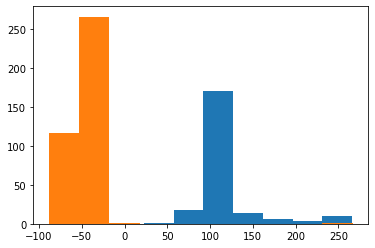

In [71]:
plt.hist(df[R_idx].RAxis)
plt.hist(df[L_idx].RAxis)
plt.show()

## hefei 

In [53]:
import  test
import imp
imp.reload(test)

<module 'test' from '/root/work/ecg_ptbxl_benchmarking/code/test.py'>

In [54]:
x0  = torch.rand(1,8, 5000)

In [55]:
model =test.ECGNet()

In [56]:
from fvcore.nn import *
tensor = (torch.rand(1,8 ,5000,),torch.rand( 1,2 ))

model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model,tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::max_pool2d encountered 2 time(s)
Unsupported operator aten::add_ encountered 39 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 3 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
bn2, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_1.0.dropout, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_1.1.dropout, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_1.2.dropout, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_2.0.dropout, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_2.1.dropout, layers1_list.0.layer[3, 3, 3, 3, 3, 3]_1_2.2.dropout, layers1_list.1.layer[5, 5, 5, 5, 3, 3]_1_1.0.dropout, layers1_list.1.layer[5, 5, 5, 5, 3, 3]_1_1.1.dropout, layers1_list.1.layer[5, 5, 5, 5, 3, 3]_1_1.2.dropout, lay

FLOPs:  2278039080 n_parameters :  19958332


In [52]:
x0  = torch.rand(1,8,5000)
fr  = torch.rand(1,2)
y = model(x0,fr)

In [89]:
from torch import nn
class DSconv1d(nn.Module):
    def __init__(self,in_ch,out_ch,ks=50,padding= 1,stride =1):
        super(DSconv1d, self).__init__()
        self.depth_conv = nn.Conv1d(in_channels=in_ch,
                                    out_channels=in_ch,
                                    kernel_size=ks,
                                    stride=stride,
                                    padding=padding,
                                    groups=in_ch)
        
        self.point_conv = nn.Conv1d(in_channels=in_ch,
                                    out_channels=out_ch,
                                    kernel_size=1,
                                    stride=1,
                                    padding=0,
                                    groups=1)
    def forward(self,x):
        out = self.depth_conv(x)
        out = self.point_conv(out)
        return out

In [103]:
model = nn.Conv1d(12,32,50,padding= 45,stride =12,bias=True)
x0 = torch.rand(1,12,5000)
y = model(x0)

n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
tensor= (x0,)
flops = FlopCountAnalysis(model,tensor)
print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters,'y shape : ',y.shape )


FLOPs:  8083200 n_parameters :  19232 y shape :  torch.Size([1, 32, 421])


In [104]:
model = DSconv1d(12,32,50,padding= 45,stride =12)
x0 = torch.rand(1,12,5000)
y = model(x0)
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
tensor= (x0,)
flops = FlopCountAnalysis(model,tensor)
print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters,'y shape : ',y.shape )


FLOPs:  414264 n_parameters :  1028 y shape :  torch.Size([1, 32, 421])


In [125]:
from models.xresnet1d_nf import xresnet1d101
import torch
model = xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])


In [14]:
from models.xresnet1d_nf_dsc import dsc_xresnet1d18
import torch
model = dsc_xresnet1d101(num_classes=31,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128],reduction = 16)


In [13]:
model

XResNet1d(
  (0): DSConvLayer(
    (0): DSconv1d(
      (depth_conv): Conv1d(12, 12, kernel_size=(50,), stride=(2,), padding=(24,), groups=12, bias=False)
      (point_conv): Conv1d(12, 64, kernel_size=(1,), stride=(1,))
    )
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (1): DSConvLayer(
    (0): DSconv1d(
      (depth_conv): Conv1d(64, 64, kernel_size=(15,), stride=(1,), padding=(7,), groups=64, bias=False)
      (point_conv): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    )
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (2): DSConvLayer(
    (0): DSconv1d(
      (depth_conv): Conv1d(64, 64, kernel_size=(5,), stride=(1,), padding=(2,), groups=64, bias=False)
      (point_conv): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    )
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (3): DSConvLaye

In [15]:
X0 = torch.rand(2,12 ,5000,)
y = model(X0)
y

tensor([[-4.8958,  1.4158, -2.9525, -1.3726, -1.1994,  3.3582,  1.0615,  3.1963,
         -0.6043,  4.3073,  1.0921, -0.2226, -0.2103, -0.7399, -2.6513, -1.6808,
         -0.8082, -0.4473, -0.5046,  1.2649, -4.7010, -1.9709, -0.0610,  2.5745,
          2.0251, -2.5941,  0.3327, -0.5874, -1.0889,  0.7198,  1.5301],
        [ 3.9357,  0.4491,  3.4043, -0.9691, -0.8677,  1.8093,  1.9763,  2.2520,
          1.9878, -0.6829,  1.5845,  2.5062, -0.6681,  0.4641, -1.4830, -1.1271,
         -1.7960, -0.1783,  3.4150,  1.3220,  1.1801,  0.4262, -0.2347, -4.4187,
         -1.9427, -0.6227, -2.2364, -0.4855, -0.2510,  2.4531, -2.6782]],
       grad_fn=<AddmmBackward>)

In [3]:
tensor = (torch.rand(1,12 ,5000,))
from fvcore.nn import *

model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model,tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::max_pool1d encountered 1 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 34 time(s)
Unsupported operator aten::mul encountered 33 time(s)
Unsupported operator aten::add encountered 33 time(s)
Unsupported operator aten::avg_pool1d encountered 3 time(s)
Unsupported operator aten::adaptive_max_pool1d encountered 1 time(s)
The following submodules of the model were never called during the trace of the graph. They may be unused, or they were accessed by direct calls to .forward() or via other python methods. In the latter case they will have zeros for statistics, though their statistics will still contribute to their parent calling module.
6.1.idpath, 6.2.idpath, 7.1.idpath, 7.2.idpath, 7.3.idpath, 8.1.idpath, 8.10.idpath, 8.11.idpath, 8.12.idpath, 8.13.idpath, 8.14.idpath, 8.15.idpath, 8.16.idpath, 8.17.idpath, 8.18.idpath, 8.19.idpath, 8.2.idpath, 8.20.idpath, 8.21.idpath, 8.22.idpath, 8.3.idpath, 8.4.idpath, 8.5.idpath, 8.6.idpath, 8.7.idpath

FLOPs:  826849408 n_parameters :  2166999


In [22]:
5000 -50+2  -15

4937

In [1]:
import torch
import torch.nn as nn


In [1]:
from models.xresnet1d_nf_dsc import dsc_xresnet1d101
from models.seresnet import se_resnext50, se_resnet50
import torch
# model = dsc_xresnet1d101(num_classes=1,input_channels=12,kernel_size=5,ps_head=0.5,lin_ftrs_head=[128])
# model = se_resnext50(num_classes =71)
model = se_resnet50(num_classes =71)

tensor = (torch.rand(1,12 ,1000,))
from fvcore.nn import *

model.eval()
n_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
flops = FlopCountAnalysis(model,tensor)

print("FLOPs: ", flops.total(), "n_parameters : " ,n_parameters)

Unsupported operator aten::max_pool1d encountered 1 time(s)
Unsupported operator aten::adaptive_avg_pool1d encountered 17 time(s)
Unsupported operator aten::sigmoid encountered 16 time(s)
Unsupported operator aten::mul encountered 16 time(s)
Unsupported operator aten::add encountered 16 time(s)


FLOPs:  3993828352 n_parameters :  18619591


In [4]:
x = torch.rand(1,12 ,5000,)
y =model(x)
y = y.view(y.size(0), -1)


In [1]:
2048 * 71

145408

In [6]:
2560000

2560000

In [7]:
512 *4

2048

In [ ]:
1, 64, 1250